# **Housing prices**

In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 545 
The number of columns (variables) is 13


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
price,545.0,4766729.25,1870439.62,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5150.54,2170.14,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.97,0.74,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.29,0.50,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.81,0.87,1.0,1.0,2.0,2.0,4.0
parking,545.0,0.69,0.86,0.0,0.0,0.0,1.0,3.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


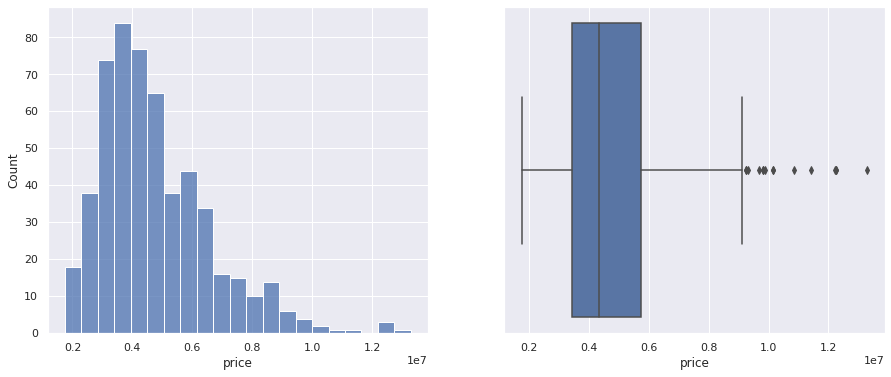

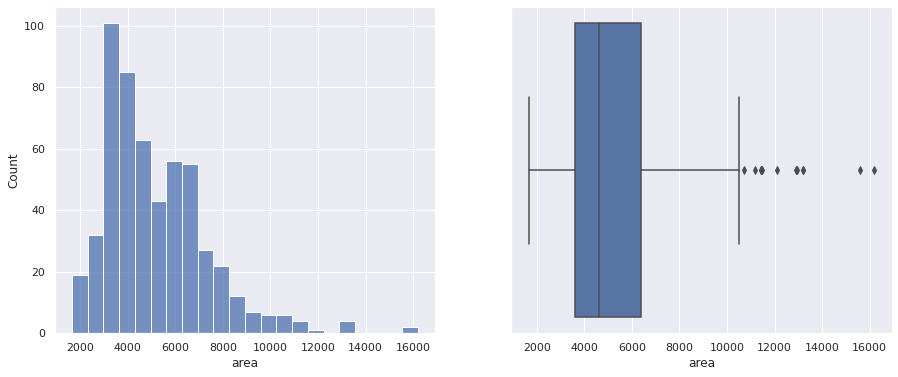

In [10]:
numerical = df[['price', 'area']]
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

In [11]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [12]:
for i in numerical:
  lrincome, urincome = remove_outlier(df[i])
  df[i]=np.where(df[i]<lrincome,lrincome,df[i])
  df[i]=np.where(df[i]>urincome,urincome,df[i])

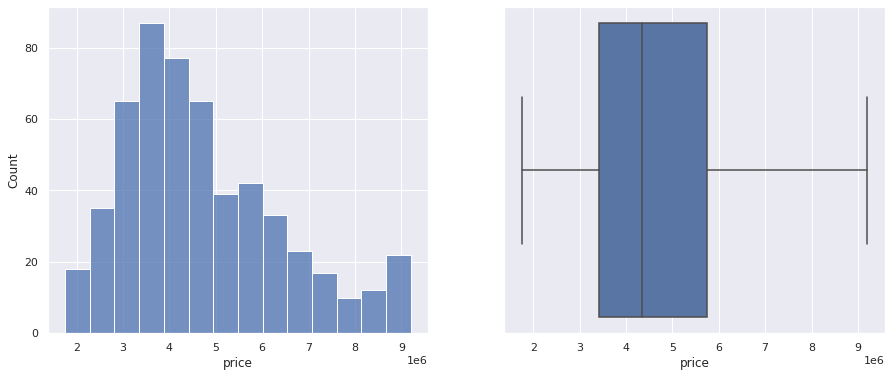

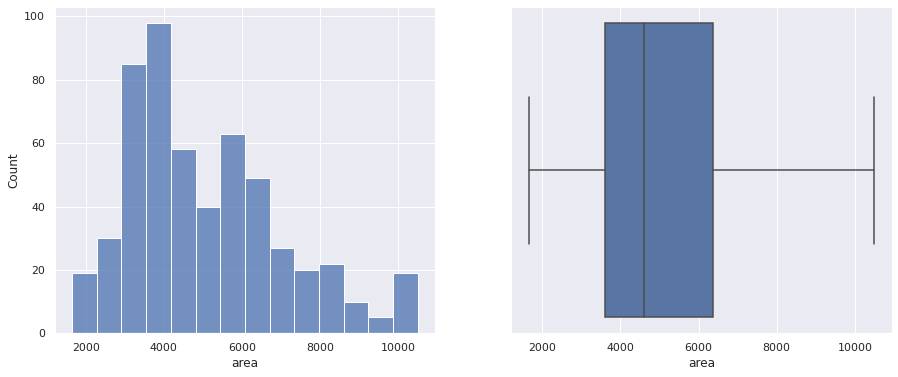

In [13]:
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

# **Encoding**

In [16]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [17]:
df['furnishingstatus']=np.where(df['furnishingstatus'] =='semi-furnished', '2', df['furnishingstatus'])
df['furnishingstatus']=np.where(df['furnishingstatus'] =='furnished', '3', df['furnishingstatus'])
df['furnishingstatus']=np.where(df['furnishingstatus'] =='unfurnished', '1', df['furnishingstatus'])

In [18]:
df = pd.get_dummies(df, columns=['mainroad','guestroom','basement', 'hotwaterheating','airconditioning','prefarea'], drop_first=True)

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,9205000.0,7420.0,4,2,3,2,3,1,0,0,0,1,1
1,9205000.0,8960.0,4,4,4,3,3,1,0,0,0,1,0
2,9205000.0,9960.0,3,2,2,2,2,1,0,1,0,0,1
3,9205000.0,7500.0,4,2,2,3,3,1,0,1,0,1,1
4,9205000.0,7420.0,4,1,2,2,3,1,1,1,0,1,0


In [20]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [21]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
price,545.0,4727387.96,1745227.26,1750000.0,3430000.0,4340000.0,5740000.0,9205000.0
area,545.0,5102.25,2005.80,1650.0,3600.0,4600.0,6360.0,10500.0
bedrooms,545.0,2.97,0.74,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.29,0.50,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.81,0.87,1.0,1.0,2.0,2.0,4.0
parking,545.0,0.69,0.86,0.0,0.0,0.0,1.0,3.0
furnishingstatus,545.0,0.93,0.76,0.0,0.0,1.0,2.0,2.0
mainroad_yes,545.0,0.86,0.35,0.0,1.0,1.0,1.0,1.0
guestroom_yes,545.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
basement_yes,545.0,0.35,0.48,0.0,0.0,0.0,1.0,1.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    float64
 1   area                 545 non-null    float64
 2   bedrooms             545 non-null    int64  
 3   bathrooms            545 non-null    int64  
 4   stories              545 non-null    int64  
 5   parking              545 non-null    int64  
 6   furnishingstatus     545 non-null    int8   
 7   mainroad_yes         545 non-null    uint8  
 8   guestroom_yes        545 non-null    uint8  
 9   basement_yes         545 non-null    uint8  
 10  hotwaterheating_yes  545 non-null    uint8  
 11  airconditioning_yes  545 non-null    uint8  
 12  prefarea_yes         545 non-null    uint8  
dtypes: float64(2), int64(4), int8(1), uint8(6)
memory usage: 29.4 KB


**Data Split: Split the data into test and train**

**Extracting the target for training set and test set**

In [23]:
X = df.drop("price", axis=1)
y = df.pop("price")

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123)

In [25]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (381, 12)
X_test (164, 12)
y_train (381,)
y_test (164,)


In [26]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### **Rsquare**

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
print('The model score on traing set: ', round(regression_model.score(X_train, y_train),3))
print('The model score on test set: ', round(regression_model.score(X_test, y_test),3))

The model score on traing set:  0.706
The model score on test set:  0.631


In [28]:
ytest_predict =  regression_model.predict(X_test)
ytrain_predict = regression_model.predict(X_train)

In [31]:
print('The model MSE on traing set: ', round(mean_squared_error(y_train,ytrain_predict),3))
print('The model MSE on test set: ', round(mean_squared_error(y_test,ytest_predict),3))

The model MSE on traing set:  884933037585.03
The model MSE on test set:  1143487359732.784


In [32]:
print('The model R Squared on traing set: ', round(r2_score(y_train,ytrain_predict),3))
print('The model R Squared on test set: ', round(r2_score(y_test,ytest_predict),3))

The model R Squared on traing set:  0.706
The model R Squared on test set:  0.631


### **Adj Rsquare**

In [33]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,price
248,4100.0,2,2,1,0,1,1,1,1,0,0,0,4543000.0
298,5800.0,3,1,1,2,1,1,0,0,1,0,0,4200000.0
148,6360.0,3,1,3,0,1,1,0,0,0,0,1,5600000.0
120,6540.0,3,1,1,2,2,1,1,1,0,0,1,5950000.0
494,6800.0,2,1,1,0,0,1,0,0,0,0,0,2730000.0


In [34]:
df.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420.0,4,2,3,2,2,1,0,0,0,1,1
1,8960.0,4,4,4,3,2,1,0,0,0,1,0
2,9960.0,3,2,2,2,1,1,0,1,0,0,1
3,7500.0,4,2,2,3,2,1,0,1,0,1,1
4,7420.0,4,1,2,2,2,1,1,1,0,1,0


In [37]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ area+bedrooms+bathrooms+stories+parking+furnishingstatus+mainroad_yes+guestroom_yes+basement_yes+hotwaterheating_yes+airconditioning_yes+prefarea_yes', data = data_train).fit()
lm1.params

Intercept             -122008.937969
area                      280.168281
bedrooms                98528.019717
bathrooms              905411.147063
stories                390766.816301
parking                150906.698339
furnishingstatus       194137.679026
mainroad_yes           369831.782570
guestroom_yes          403971.375006
basement_yes           284402.049467
hotwaterheating_yes    471298.544295
airconditioning_yes    887693.083982
prefarea_yes           653178.436785
dtype: float64

In [38]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     73.74
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           4.29e-90
Time:                        15:06:47   Log-Likelihood:                -5781.0
No. Observations:                 381   AIC:                         1.159e+04
Df Residuals:                     368   BIC:                         1.164e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.22e+05   2

In [43]:
model2 = smf.ols(formula= 'price ~ area+bathrooms+stories+parking+furnishingstatus+guestroom_yes+airconditioning_yes+prefarea_yes', data = data_train).fit()
model2.params

Intercept              387492.412869
area                      289.667224
bathrooms              961515.251160
stories                402104.664738
parking                177373.282794
furnishingstatus       216980.260053
guestroom_yes          532247.147229
airconditioning_yes    876699.662393
prefarea_yes           744317.052425
dtype: float64

In [44]:
print(model2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.19e-90
Time:                        15:09:29   Log-Likelihood:                -5789.2
No. Observations:                 381   AIC:                         1.160e+04
Df Residuals:                     372   BIC:                         1.163e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.875e+05   1

In [45]:
mse = np.mean((model2.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

923732193516.9531

In [48]:
print('The model RMSE on traing set: ', round(np.sqrt(mse),3))

The model RMSE on traing set:  961109.876


In [49]:
ytest_predict =  model2.predict(X_test)

### **Mean sqaure error**

In [51]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test,ytest_predict)
print('The model RMSE on test set: ', round(np.sqrt(mse_test),3))

The model RMSE on test set:  1143904.04


In [52]:
for i,j in np.array(model2.params.reset_index()):
  print('({}) * {} +'.format(round(j,2),i),end=' ')

(387492.41) * Intercept + (289.67) * area + (961515.25) * bathrooms + (402104.66) * stories + (177373.28) * parking + (216980.26) * furnishingstatus + (532247.15) * guestroom_yes + (876699.66) * airconditioning_yes + (744317.05) * prefarea_yes + 